In [1]:
import sys, os
from pathlib import Path
home = str(Path.home())
py_dir = home+'/repositories/ai-x/core/parameter_analysis'
sys.path.insert(0, py_dir)
from parameter_analysis import *

core_dir = home+'/repositories/ai-x/core'
sys.path.insert(0, core_dir)
from misc import check_output_dir
output_dir = "output_dir"
check_output_dir(output_dir, keep_old = False)


# show multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# removes warning
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

def compute_composite_score(row, weights, maximize, minimize, time_penalty_weight, negative_r2_penalty):
    score = 0
    for metric in maximize:
        score += row[metric] * weights.get(metric, 1)
    for metric in minimize:
        score -= row[metric] * weights.get(metric, 1)
    # Add penalty for longer times
    score -= row['time'] * time_penalty_weight
    # Add penalty for negative R2
    if row['R2'] < 0.5:
        score -= negative_r2_penalty
    return score


In [2]:
weights = {
    'R2': 2.0,
    'RMSE': 1.0
}
time_penalty_weight = 0.001  
negative_r2_penalty = 10.0   
maximize = ['R2']
minimize = ['RMSE']
x_percent = 0.15

In [3]:
# Get the current user's home directory
modeldir = home+"/repositories/ai-DR/models/parameter_analysis/models4"
# modeldir = "/home/wons2/repositories/ai-DR/models/parameter_analysis/models4"
df = get_data(modeldir)
metric = "composite_score"

df['composite_score'] = df.apply(lambda row: compute_composite_score(row, weights, maximize, minimize, time_penalty_weight, negative_r2_penalty), axis=1)
df = df.sort_values(by = metric, ascending = False)
df = df.reset_index(drop = True)

n_top = int(len(df)*x_percent)
top_composite_score = max(df[metric].head(n_top))
bottom_composite_score = min(df[metric].head(n_top))
inclements = top_composite_score - bottom_composite_score
inclements

Sample of 7000



0.12316179080849232

In [4]:
dict_para = criteria2(df, "composite_score", inclements = inclements)
dict_para

{'epochs': [160, 640, 1280],
 'hidden_layers': [1, 2],
 'neurons': [6144, 7168, 8192],
 'learning_rate': [3.1622776601683788e-06, 1e-05, 3.1622776601683795e-05],
 'batch_size': [256, 512, 1024],
 'dropout': [0.0, 0.1]}

# Epochs

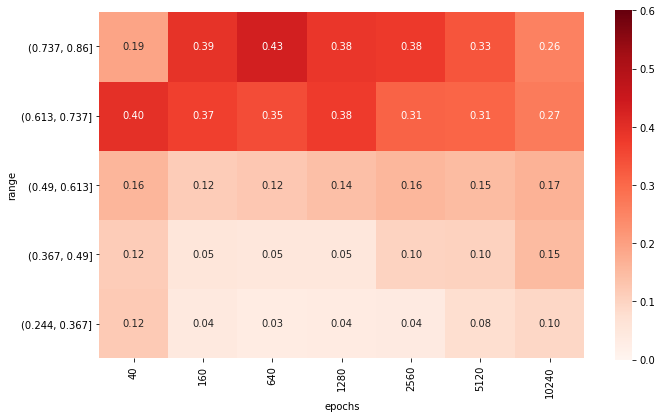

epochs,40,160,640,1280,2560,5120,10240
range,,,,,,,
"(0.244, 0.367]",0.121,0.044,0.033,0.035,0.038,0.078,0.095
"(0.367, 0.49]",0.116,0.054,0.050,0.051,0.101,0.103,0.150
"(0.49, 0.613]",0.159,0.116,0.125,0.143,0.158,0.148,0.168
"(0.613, 0.737]",0.397,0.370,0.349,0.376,0.310,0.308,0.269
"(0.737, 0.86]",0.194,0.393,0.434,0.385,0.379,0.333,0.257


In [5]:
save2png = output_dir+"/heatmap_epochs.png"
parameter = 'epochs'
# plot_heatmap(df, parameter, y=metric, ymin=ymin, ymax=ymax, inclements=inclements, save2png = "")
plot_heatmap(df, parameter, metric, inclements=inclements, save2png = save2png)

# Hidden Layers

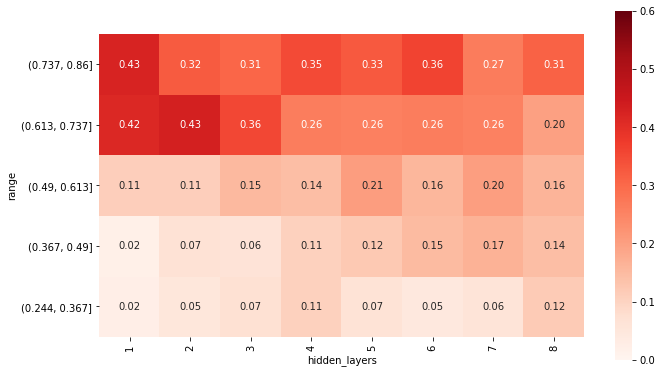

hidden_layers,1,2,3,4,5,6,7,8
range,,,,,,,,
"(0.244, 0.367]",0.024,0.054,0.075,0.106,0.067,0.046,0.062,0.119
"(0.367, 0.49]",0.021,0.069,0.064,0.106,0.124,0.151,0.167,0.145
"(0.49, 0.613]",0.110,0.111,0.153,0.143,0.206,0.158,0.204,0.164
"(0.613, 0.737]",0.416,0.432,0.356,0.264,0.258,0.263,0.256,0.199
"(0.737, 0.86]",0.425,0.324,0.305,0.351,0.326,0.361,0.265,0.312


In [6]:
save2png = output_dir+"/heatmap_hidden_layers.png"
parameter = 'hidden_layers'
# plot_heatmap(df, parameter, y=metric, ymin=ymin, ymax=ymax, inclements=inclements, save2png = "")
plot_heatmap(df, parameter, metric, inclements=inclements, save2png = save2png)

# Neurons

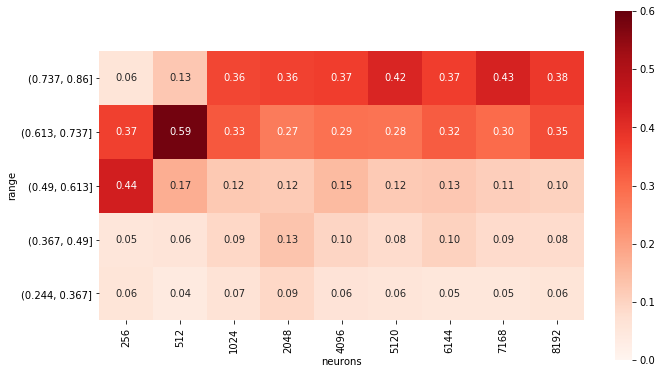

neurons,256,512,1024,2048,4096,5120,6144,7168,8192
range,,,,,,,,,
"(0.244, 0.367]",0.059,0.041,0.067,0.092,0.063,0.058,0.052,0.054,0.060
"(0.367, 0.49]",0.054,0.061,0.092,0.131,0.096,0.084,0.104,0.087,0.082
"(0.49, 0.613]",0.438,0.175,0.124,0.119,0.152,0.122,0.127,0.112,0.104
"(0.613, 0.737]",0.368,0.585,0.329,0.269,0.287,0.282,0.323,0.300,0.348
"(0.737, 0.86]",0.059,0.126,0.357,0.364,0.372,0.421,0.372,0.429,0.381


In [11]:
save2png = output_dir+"/heatmap_neurons.png"

parameter = 'neurons'
# plot_heatmap(df, parameter, y=metric, ymin=ymin, ymax=ymax, inclements=inclements, save2png = "")
plot_heatmap(df, parameter, metric, inclements=inclements, save2png = save2png)

# Learning Rate

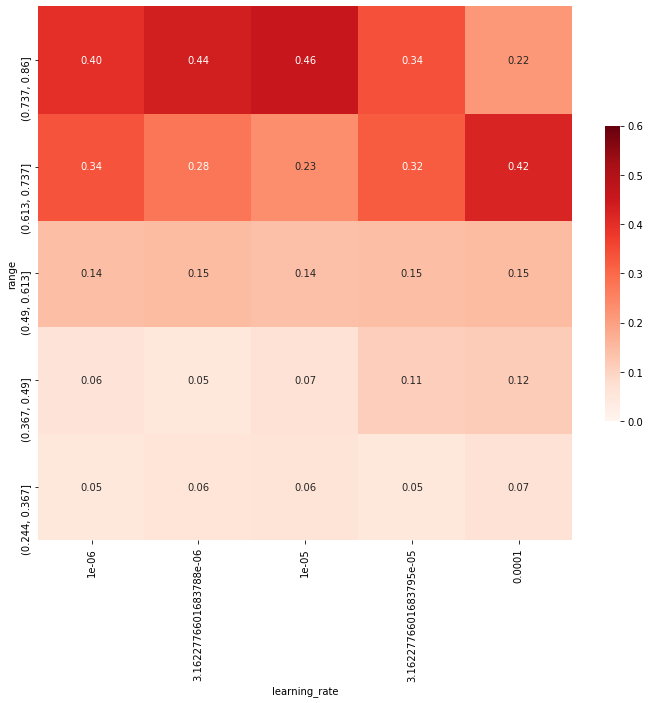

learning_rate,0.000001,0.000003,0.000010,0.000032,0.000100
range,,,,,
"(0.244, 0.367]",0.052,0.060,0.064,0.053,0.069
"(0.367, 0.49]",0.063,0.054,0.069,0.111,0.117
"(0.49, 0.613]",0.144,0.148,0.141,0.145,0.149
"(0.613, 0.737]",0.336,0.278,0.233,0.321,0.424
"(0.737, 0.86]",0.399,0.437,0.456,0.342,0.218


In [12]:
save2png = output_dir+"/heatmap_learning_rate.png"

parameter = 'learning_rate'
# plot_heatmap(df, parameter, y=metric, ymin=ymin, ymax=ymax, inclements=inclements, save2png = "")
plot_heatmap(df, parameter, metric, inclements=inclements, save2png = save2png)

# Batch Size

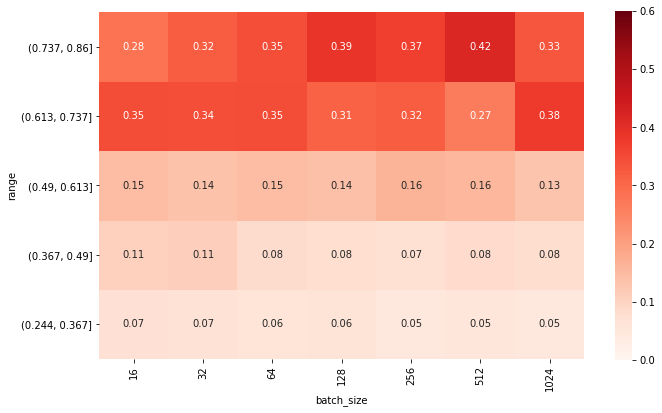

batch_size,16,32,64,128,256,512,1024
range,,,,,,,
"(0.244, 0.367]",0.071,0.069,0.059,0.064,0.047,0.055,0.050
"(0.367, 0.49]",0.106,0.112,0.084,0.078,0.073,0.085,0.081
"(0.49, 0.613]",0.146,0.137,0.145,0.142,0.163,0.158,0.131
"(0.613, 0.737]",0.349,0.345,0.348,0.314,0.320,0.265,0.375
"(0.737, 0.86]",0.282,0.320,0.346,0.389,0.370,0.418,0.331


In [13]:
save2png = output_dir+"/heatmap_batch_size.png"

parameter = 'batch_size'
# plot_heatmap(df, parameter, y=metric, ymin=ymin, ymax=ymax, inclements=inclements, save2png = "")
plot_heatmap(df, parameter, metric, inclements=inclements, save2png = save2png)

# Dropout

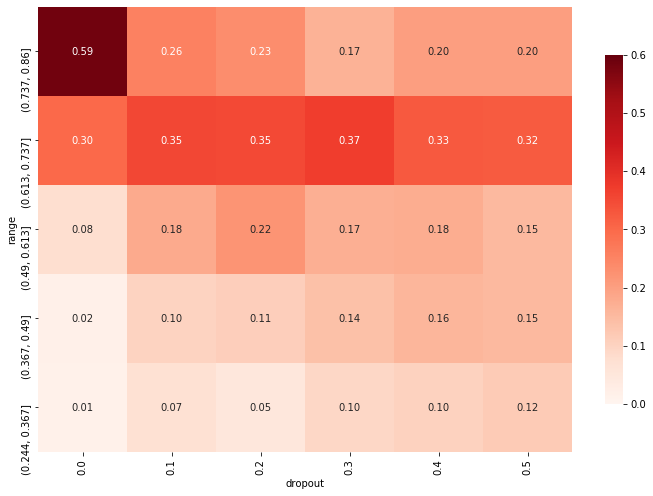

dropout,0.0,0.1,0.2,0.3,0.4,0.5
range,,,,,,
"(0.244, 0.367]",0.014,0.074,0.052,0.096,0.105,0.118
"(0.367, 0.49]",0.018,0.103,0.111,0.139,0.160,0.154
"(0.49, 0.613]",0.077,0.181,0.222,0.172,0.177,0.154
"(0.613, 0.737]",0.302,0.354,0.353,0.371,0.326,0.324
"(0.737, 0.86]",0.587,0.257,0.235,0.167,0.202,0.202


In [14]:
save2png = output_dir+"/heatmap_dropout.png"

parameter = 'dropout'
# plot_heatmap(df, parameter, y=metric, ymin=ymin, ymax=ymax, inclements=inclements, save2png = "")
plot_heatmap(df, parameter, metric, inclements=inclements, save2png = save2png)